In [164]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from itertools import islice

In [165]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [166]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [167]:
def create_date_col(df_m):
    date_lst = []
    for index, row in df_m.iterrows():
        day = str(df_m['ride_begin'][index].day)
        month = str(df_m['ride_begin'][index].month)
        year = str(df_m['ride_begin'][index].year)
        date_text = year + '-' + month + '-' + day
        date_lst.append(date_text)
    return date_lst

In [168]:
def trim_latlng(x):
    return round(x,4)

In [169]:
fmt = '%Y-%m-%d %H:%M:%S'

In [170]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-06.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [171]:
df.drop('old_index', axis=1, inplace=True)

In [172]:
df['ride_begin'] = df['ride_begin'].map(parse_timestamp)
df['ride_end'] = df['ride_end'].map(parse_timestamp)

In [173]:
df['lat_begin'] = df['lat_begin'].map(trim_latlng)
df['lng_begin'] = df['lng_begin'].map(trim_latlng)
df['lat_end'] = df['lat_end'].map(trim_latlng)
df['lng_end'] = df['lng_end'].map(trim_latlng)

In [174]:
df['date'] = create_date_col(df)

In [175]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,name,available_bikes,calculated_distance,date
0,50.9321,6.9882,50.9373,6.9990,2020-06-30 17:34:02,2020-06-30 17:45:02,11.0,960.0,31775314,31786598,166.0,BIKE 22731,1109,6500.0,2020-6-30
1,50.9373,6.9990,50.9321,6.9883,2020-06-30 17:51:01,2020-06-30 17:59:01,8.0,952.0,31786598,31787660,6.0,BIKE 22731,1106,4000.0,2020-6-30
2,50.9321,6.9883,50.9291,6.9983,2020-06-30 18:51:01,2020-06-30 19:04:01,13.0,772.0,31787660,31792269,52.0,BIKE 22731,1110,6500.0,2020-6-30
3,50.9291,6.9983,50.9127,6.9477,2020-06-30 19:43:01,2020-06-30 20:07:02,24.0,3990.0,31792269,31796586,39.0,BIKE 22731,1112,11500.0,2020-6-30
4,50.9576,6.9926,50.9489,7.0024,2020-06-01 09:01:01,2020-06-01 09:39:02,38.0,1181.0,30461646,30477061,541.0,BIKE 21155,1058,16500.0,2020-6-1


In [176]:
df['calculated_distance'].max()

291500.0

In [177]:
df['calculated_distance'].min()

1500.0

In [178]:
df['calculated_distance'].value_counts(dropna=False)

6500.0      13694
11500.0      8648
9000.0       8218
4000.0       6409
14000.0      4230
16500.0      3593
19000.0      1806
21500.0      1786
26500.0      1042
24000.0       981
29000.0       610
31500.0       601
56500.0       373
61500.0       345
36500.0       342
34000.0       337
59000.0       293
66500.0       272
46500.0       268
64000.0       236
41500.0       231
54000.0       217
44000.0       214
51500.0       199
69000.0       187
71500.0       183
76500.0       182
39000.0       181
49000.0       177
74000.0       146
            ...  
231500.0       15
226500.0       15
139000.0       15
204000.0       15
146500.0       15
224000.0       14
221500.0       14
236500.0       14
246500.0       14
234000.0       14
199000.0       13
269000.0       12
189000.0       12
276500.0       12
229000.0       12
274000.0       11
289000.0       11
281500.0       11
241500.0       10
194000.0       10
279000.0       10
254000.0       10
271500.0        9
264000.0        8
244000.0  

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58816 entries, 0 to 58815
Data columns (total 15 columns):
lat_begin               58816 non-null float64
lng_begin               58816 non-null float64
lat_end                 58816 non-null float64
lng_end                 58816 non-null float64
ride_begin              58816 non-null datetime64[ns]
ride_end                58816 non-null datetime64[ns]
ride_time               58816 non-null float64
distance                58816 non-null float64
uid_begin               58816 non-null int64
uid_end                 58816 non-null int64
standing_before_ride    58816 non-null float64
name                    58816 non-null object
available_bikes         58816 non-null int64
calculated_distance     58816 non-null float64
date                    58816 non-null object
dtypes: datetime64[ns](2), float64(8), int64(3), object(2)
memory usage: 6.7+ MB


In [180]:
df.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes,calculated_distance
count,58816.000000,58816.000000,58816.000000,58816.000000,58816.000000,58816.000000,5.881600e+04,5.881600e+04,58816.000000,58816.000000,58816.000000
mean,50.940235,6.948693,50.940281,6.948653,45.345807,2097.134708,3.110630e+07,3.112217e+07,365.694097,1117.493097,20412.965860
std,0.020773,0.032191,0.020903,0.032235,78.224741,1530.074835,5.741726e+05,5.058389e+05,925.336241,36.579248,32593.452891
min,50.736600,6.808200,50.738400,6.765100,2.000000,200.000000,3.593700e+05,3.593700e+05,0.000000,1030.000000,1500.000000
25%,50.926700,6.925800,50.926700,6.925800,13.000000,939.000000,3.076939e+07,3.078135e+07,31.000000,1087.000000,6500.000000
50%,50.938300,6.946700,50.938300,6.946700,21.000000,1734.000000,3.112897e+07,3.114710e+07,102.000000,1122.000000,11500.000000
75%,50.953100,6.966600,50.953200,6.966600,38.000000,2874.250000,3.143817e+07,3.145041e+07,366.000000,1148.000000,16500.000000
max,51.461900,7.145900,51.462000,7.145900,698.000000,14317.000000,3.180570e+07,3.180678e+07,39825.000000,1193.000000,291500.000000


/ssd/jelicicna/thesisenv/lib/python3.5/site-packages/seaborn/regression.py:576: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


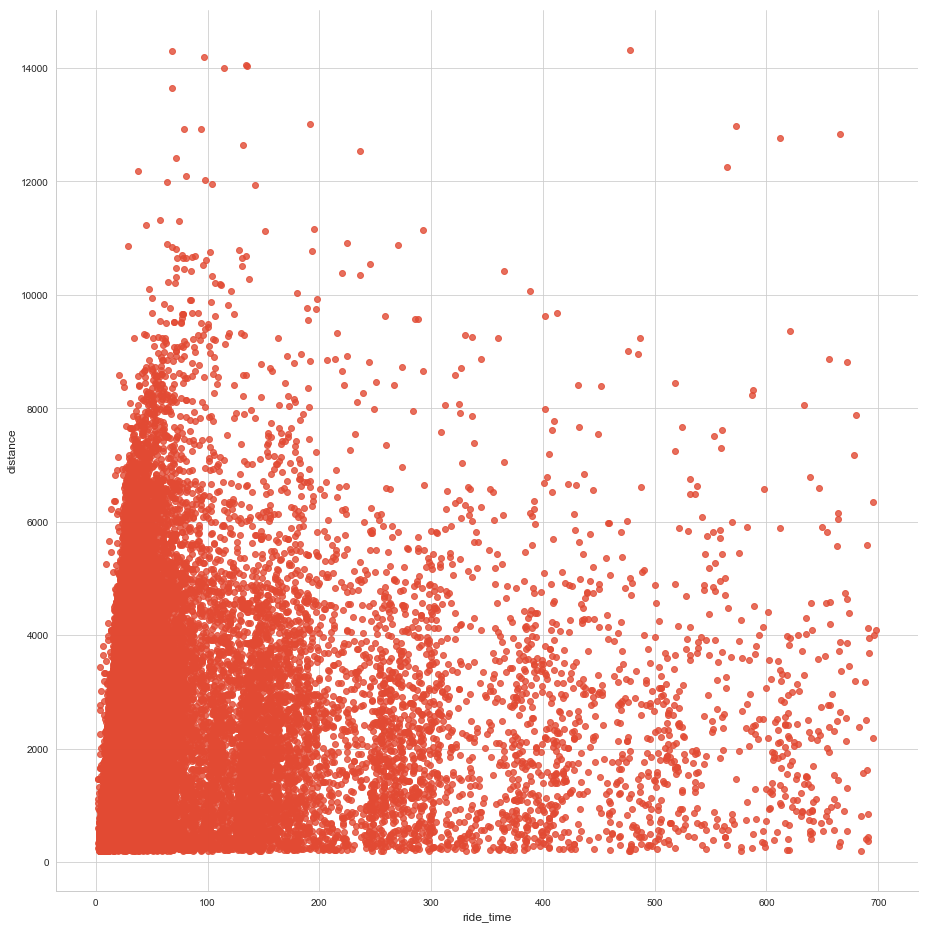

In [181]:
sns.set_style('whitegrid')
sns.lmplot('ride_time','distance',data=df,
           palette='coolwarm',size=13,aspect=1,fit_reg=False)

In [182]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,name,available_bikes,calculated_distance,date
0,50.9321,6.9882,50.9373,6.9990,2020-06-30 17:34:02,2020-06-30 17:45:02,11.0,960.0,31775314,31786598,166.0,BIKE 22731,1109,6500.0,2020-6-30
1,50.9373,6.9990,50.9321,6.9883,2020-06-30 17:51:01,2020-06-30 17:59:01,8.0,952.0,31786598,31787660,6.0,BIKE 22731,1106,4000.0,2020-6-30
2,50.9321,6.9883,50.9291,6.9983,2020-06-30 18:51:01,2020-06-30 19:04:01,13.0,772.0,31787660,31792269,52.0,BIKE 22731,1110,6500.0,2020-6-30
3,50.9291,6.9983,50.9127,6.9477,2020-06-30 19:43:01,2020-06-30 20:07:02,24.0,3990.0,31792269,31796586,39.0,BIKE 22731,1112,11500.0,2020-6-30
4,50.9576,6.9926,50.9489,7.0024,2020-06-01 09:01:01,2020-06-01 09:39:02,38.0,1181.0,30461646,30477061,541.0,BIKE 21155,1058,16500.0,2020-6-1


## Normalization

In [183]:
#adding tracking of original indexes to merge tables with
df.reset_index(inplace=True)
df.rename({'index':'org_index'}, axis=1, inplace=True)

In [184]:
bikes = df[["name"]].drop_duplicates().reset_index(drop=True)
bikes["bike_id"]=bikes.index
bikes = bikes[["bike_id", "name"]]
bikes.head() #df with 2 columns containing bike id and corresponding bike names

,bike_id,name
0,0,BIKE 22731
1,1,BIKE 21155
2,2,BIKE 21596
3,3,BIKE 22401
4,4,BIKE 22763


In [185]:
#adding bike id to df
df = pd.merge(df, bikes, on='name', how='outer')

In [186]:
df

,org_index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,name,available_bikes,calculated_distance,date,bike_id
0,0,50.9321,6.9882,50.9373,6.9990,2020-06-30 17:34:02,2020-06-30 17:45:02,11.0,960.0,31775314,31786598,166.0,BIKE 22731,1109,6500.0,2020-6-30,0
1,1,50.9373,6.9990,50.9321,6.9883,2020-06-30 17:51:01,2020-06-30 17:59:01,8.0,952.0,31786598,31787660,6.0,BIKE 22731,1106,4000.0,2020-6-30,0
2,2,50.9321,6.9883,50.9291,6.9983,2020-06-30 18:51:01,2020-06-30 19:04:01,13.0,772.0,31787660,31792269,52.0,BIKE 22731,1110,6500.0,2020-6-30,0
3,3,50.9291,6.9983,50.9127,6.9477,2020-06-30 19:43:01,2020-06-30 20:07:02,24.0,3990.0,31792269,31796586,39.0,BIKE 22731,1112,11500.0,2020-6-30,0
4,4,50.9576,6.9926,50.9489,7.0024,2020-06-01 09:01:01,2020-06-01 09:39:02,38.0,1181.0,30461646,30477061,541.0,BIKE 21155,1058,16500.0,2020-6-1,1
5,5,50.9485,7.0018,50.9482,7.0063,2020-06-03 12:31:02,2020-06-03 14:54:02,143.0,317.0,30478891,30574714,2965.0,BIKE 21155,1095,61500.0,2020-6-3,1
6,6,50.9482,7.0063,50.9517,7.0096,2020-06-03 16:14:01,2020-06-03 16:32:02,18.0,447.0,30574714,30579404,80.0,BIKE 21155,1066,9000.0,2020-6-3,1
7,7,50.9517,7.0096,50.9318,6.9974,2020-06-04 00:22:02,2020-06-04 05:22:01,300.0,2369.0,30579404,30602662,470.0,BIKE 21155,1101,126500.0,2020-6-4,1
8,8,50.9318,6.9974,50.9444,6.9719,2020-06-04 06:21:02,2020-06-04 06:46:01,25.0,2271.0,30602662,30605848,59.0,BIKE 21155,1100,11500.0,2020-6-4,1
9,9,50.9444,6.9719,50.9302,6.9538,2020-06-04 16:53:02,2020-06-04 17:26:02,33.0,2028.0,30605848,30624650,607.0,BIKE 21155,1104,16500.0,2020-6-4,1


In [189]:
#checking for a number of unique locations
df.groupby(['lat_begin','lng_begin']).count()

,,org_index,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,name,available_bikes,calculated_distance,date,bike_id
lat_begin,lng_begin,,,,,,,,,,,,,,,
50.7366,7.1039,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50.7384,7.1029,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50.7987,6.8792,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50.8217,6.9036,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50.8281,6.9045,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50.8289,6.9085,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
50.8290,6.9085,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
50.8291,6.9085,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
50.8461,6.8583,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [190]:
#creating a list of unique locations
locations = [] #a list of marked locations
new_col = []
count = 0
first_row_data = df.iloc[0]
loc_str = str([first_row_data['lat_begin'],first_row_data['lng_begin']])
new_col.append(loc_str)
locations.append(loc_str)
for index, row in islice(df.iterrows(), 1, None):
    loc_str = str([row['lat_begin'],row['lng_begin']])
    new_col.append(loc_str)
    if loc_str in locations:
        count += 1
        #print('already placed' + str(count))
    else:
        locations.append(loc_str)

In [191]:
#checking for the expected number of unique locations
len(locations)

47360

In [192]:
len(new_col)

58816

In [193]:
df_locations = pd.DataFrame()
df_locations['latlng'] = locations
df_locations.reset_index(inplace=True)
df_locations.rename({'index':'location_id'}, axis=1, inplace=True)

In [194]:
df_locations

,location_id,latlng
0,0,"[50.9321, 6.9882]"
1,1,"[50.9373, 6.999]"
2,2,"[50.9321, 6.9883]"
3,3,"[50.9291, 6.9983]"
4,4,"[50.9576, 6.9926]"
5,5,"[50.9485, 7.0018]"
6,6,"[50.9482, 7.0063]"
7,7,"[50.9517, 7.0096]"
8,8,"[50.9318, 6.9974]"
9,9,"[50.9444, 6.9719]"


In [195]:
df['latlng'] = new_col

In [197]:
df = pd.merge(df, df_locations, on='latlng', how='outer')

In [198]:
df

,org_index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,name,available_bikes,calculated_distance,date,bike_id,latlng,location_id
0,0,50.9321,6.9882,50.9373,6.9990,2020-06-30 17:34:02,2020-06-30 17:45:02,11.0,960.0,31775314,31786598,166.0,BIKE 22731,1109,6500.0,2020-6-30,0,"[50.9321, 6.9882]",0
1,3913,50.9321,6.9882,50.9307,6.9824,2020-06-21 21:58:01,2020-06-21 22:05:01,7.0,434.0,31352029,31352773,15.0,BIKE 22079,1139,4000.0,2020-6-21,71,"[50.9321, 6.9882]",0
2,4974,50.9321,6.9882,50.9365,6.9859,2020-06-08 21:06:02,2020-06-08 21:11:02,5.0,519.0,30770038,30771166,26.0,BIKE 22937,1057,4000.0,2020-6-8,89,"[50.9321, 6.9882]",0
3,6193,50.9321,6.9882,50.9353,6.9939,2020-06-10 16:04:01,2020-06-10 16:14:01,10.0,540.0,30812496,30838207,1127.0,BIKE 22261,1065,6500.0,2020-6-10,107,"[50.9321, 6.9882]",0
4,29457,50.9321,6.9882,50.9370,6.9858,2020-06-02 07:41:02,2020-06-02 07:46:02,5.0,571.0,30515504,30519721,437.0,BIKE 22306,1035,4000.0,2020-6-2,489,"[50.9321, 6.9882]",0
5,42879,50.9321,6.9882,50.9183,6.9782,2020-06-16 06:28:02,2020-06-16 06:48:01,20.0,1689.0,31065195,31098218,968.0,BIKE 22951,1120,9000.0,2020-6-16,695,"[50.9321, 6.9882]",0
6,48251,50.9321,6.9882,50.9294,6.9986,2020-06-06 15:48:02,2020-06-06 15:57:02,9.0,791.0,30684358,30686606,40.0,BIKE 22109,1047,6500.0,2020-6-6,780,"[50.9321, 6.9882]",0
7,50360,50.9321,6.9882,50.9427,6.9982,2020-06-17 19:41:03,2020-06-17 19:51:02,10.0,1377.0,31177673,31179169,17.0,BIKE 21748,1147,6500.0,2020-6-17,814,"[50.9321, 6.9882]",0
8,51608,50.9321,6.9882,50.9360,6.9871,2020-06-20 22:28:02,2020-06-20 22:45:02,17.0,441.0,31309869,31312403,62.0,BIKE 21188,1146,9000.0,2020-6-20,832,"[50.9321, 6.9882]",0
9,1,50.9373,6.9990,50.9321,6.9883,2020-06-30 17:51:01,2020-06-30 17:59:01,8.0,952.0,31786598,31787660,6.0,BIKE 22731,1106,4000.0,2020-6-30,0,"[50.9373, 6.999]",1
